In [1]:
# check if we are running on colab
try:
    from google.colab import files
    _ON_COLAB = True
except:
    _ON_COLAB = False

# numpy is a libarary used to do all kinds of mathematical operations
import numpy as np

# pandas allows us to organise data as tables (called "dataframes")
import pandas as pd

# we are using the chi2 distribution for some statistical tests
from scipy.stats import chi2

# this function allows us to perform one sample t-tests
from scipy.stats import ttest_1samp

# seed the random number genrator
rng = np.random.default_rng(12345)

if _ON_COLAB:
    # this allows us to make interactive figures
    from google.colab import output
    output.enable_custom_widget_manager()

    # load in some custom functions for this block practical
    !rm -r *
    !git clone https://github.com/jangrohn/ComputationalModelingBlockPractical
    !cp -R ComputationalModelingBlockPractical/session4/ session4
    !rm -rf ComputationalModelingBlockPractical

    # download the dataset from Blain & Rudledge 2020.
    !wget "https://github.com/BastienBlain/MSWB_LearningNotReward/raw/main/PublicCode/Blain_MoodTracksLearning_data.mat"

%pip install -r ./session4/requirements.txt
from session4 import loading, plotting, fitting

Cloning into 'ComputationalModelingBlockPractical'...
remote: Enumerating objects: 705, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 705 (delta 8), reused 9 (delta 4), pack-reused 689 (from 1)
Receiving objects: 100% (705/705), 9.58 MiB | 26.72 MiB/s, done.
Resolving deltas: 100% (405/405), done.
--2025-04-10 17:42:46--  https://github.com/BastienBlain/MSWB_LearningNotReward/raw/main/PublicCode/Blain_MoodTracksLearning_data.mat
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BastienBlain/MSWB_LearningNotReward/main/PublicCode/Blain_MoodTracksLearning_data.mat [following]
--2025-04-10 17:42:47--  https://raw.githubusercontent.com/BastienBlain/MSWB_LearningNotReward/main/PublicCode/Blain_MoodTracksLearning_data.mat
Resolving raw.githubusercontent.com (raw.

In [2]:
# check if we are running on colab
try:
    from google.colab import files
    _ON_COLAB = True
except:
    _ON_COLAB = False

if _ON_COLAB:
    %pip install -r ./session2/requirements.txt

# numpy is a libarary used to do all kinds of mathematical operations
import numpy as np

# pandas allows us to organise data as tables (called "dataframes")
import pandas as pd

# seed the random number genrator
rng = np.random.default_rng(12345)

if _ON_COLAB:
    # this allows us to make interactive figures
    from google.colab import output
    output.enable_custom_widget_manager()

    # load in some custom functions for this block practical
    !rm -r *
    !git clone https://github.com/jangrohn/ComputationalModelingBlockPractical
    !cp -R ComputationalModelingBlockPractical/session2/ session2
    !rm -rf ComputationalModelingBlockPractical

from session2 import plotting, fitting # type: ignore

ERROR: Could not open requirements file: [Errno 2] No such file or directory: './session2/requirements.txt'
Cloning into 'ComputationalModelingBlockPractical'...
remote: Enumerating objects: 705, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 705 (delta 8), reused 9 (delta 4), pack-reused 689 (from 1)
Receiving objects: 100% (705/705), 9.58 MiB | 25.60 MiB/s, done.
Resolving deltas: 100% (405/405), done.


# Introduction

Decision-making involves dynamic learning, where individuals update their beliefs based on experience. Prior research (Behrens et al., 2007) suggests that individuals adjust their learning rates based on environmental volatility, learning more rapidly in unstable contexts. Additionally, how individuals integrate reward probability and magnitude when making decisions remains debated. Theoretical models propose two possibilities: a multiplicative utility function, where probability and reward magnitude interact, and an additive function, where each factor is weighted separately (Blain & Rutledge, 2020). This study tests two hypotheses: (1) individuals exhibit different learning rates in stable versus volatile environments, and (2) decisions are better modeled by an additive utility function. We apply computational modeling and statistical testing to analyze real participant data.


# Methods

## Participants


Data from Blain and Rutledge (2020) was used, comprising 75 healthy participants (age range 18–35, 51 females). 37 completed the stable learning task first and the volatile learning task second. Group allocation was randomised, and participants were paid £10 for their participation.
Before looking at the participant data, I decided to consider excluding participants who have a) inverse temperature beta at lower extreme (implying that participant is choosing close to randomly and not learning), and b) omega at high extreme (implying that participant is completely disregarding probability and only choosing based on magnitude, which would erode our trust in alpha as a reflection of participant learning.)

After looking at the data, I excluded 2 participants for these reasons, respectively: participants 49 and 55 seemed to only be choosing based on magnitude (omega close to 1). Moreover, participant 49 seemed to be choosing randomly in either/both volatile or/and stable environments (beta close to 0). Altogether, these participants did not seem to be meaningfully learning, therefore their data were excluded, leaving 73 participants’ data to be analysed.


In [3]:
exclude = [49]
exclude = [55]

## Task Design

The experimental task analyzed in this study follows the paradigm detailed in Blain & Rutledge (2020), which investigates how participants learn from reward probabilities in environments of varying stability. Participants completed a reinforcement learning task where they were told to maximise their total points across repeated selections between two cars.
This task consisted of two blocks, which were counterbalanced across participants: a stable block (where one car consistently had an 80% probability of winning) and a volatile block (where probabilities alternated every 20 trials, switching between 80% in favor of one car and 80% in favor of the other). Each trial began with a fixation symbol at the center of the screen, followed by a display of the two cars without the possibility to choose, allowing participants time to read the reward magnitudes. The potential rewards were then revealed, and to avoid stress effects, choices were made without time constraints. On each trial, the reward probability determined whether a car won, but the actual reward magnitude was randomly assigned and independent of this probability, to evaluate the interaction between magnitude and probability in the utility calculations participants make. The chosen car was then outlined in yellow, and feedback was provided; if the selected car was correct, both the car frame and reward magnitude appeared in green; otherwise, the car frame turned red and was crossed out (refer to Figure 1).

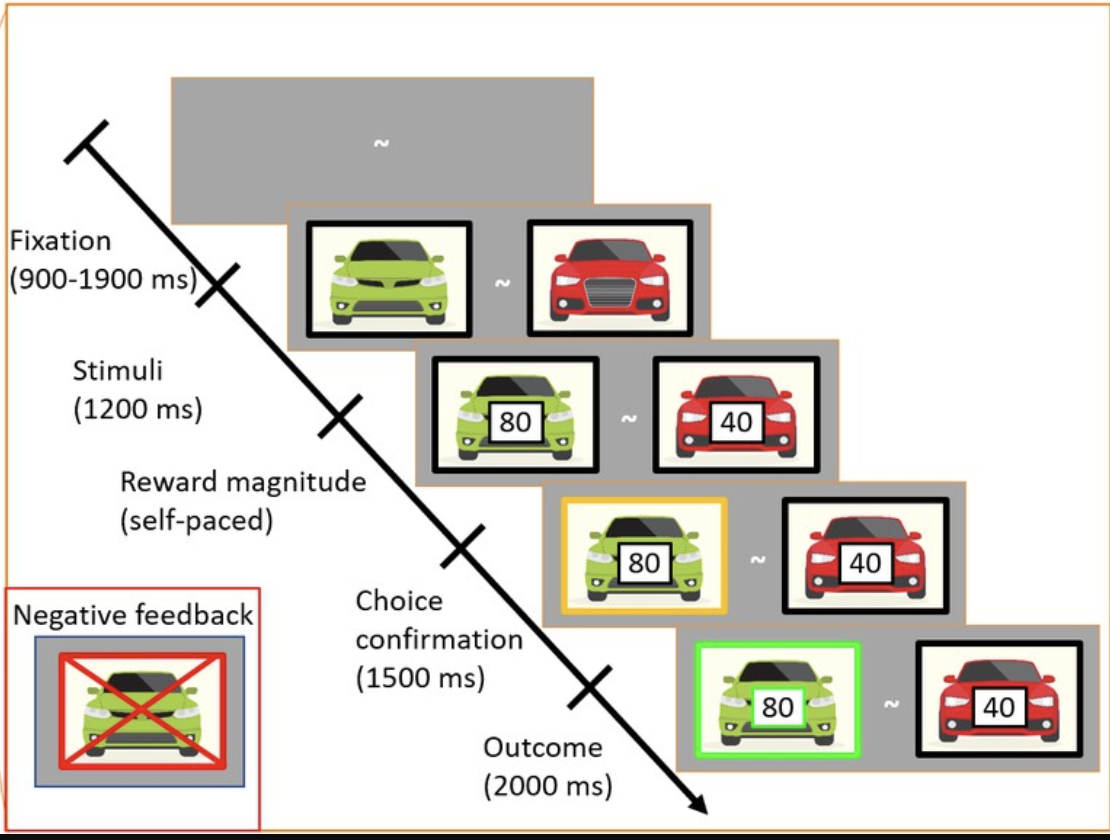

Figure 1: The task included two counterbalanced blocks: a stable block with fixed reward probabilities and a volatile block where probabilities switched every 20 trials. Each trial started with a fixation symbol, followed by a display of the two cars and their reward magnitudes. Participants then selected a car without time pressure. Winning was based on probability, while reward magnitudes were randomly assigned. The chosen car was highlighted in yellow, and feedback was given—green for a win, red and crossed out for a loss.


## Computational Model Description

We implemented a reinforcement learning model where participants update their reward expectations based on a prediction error. On each trial $t$, the model computes a prediction error, which is the difference between the observed and the predicted outcome:

$$
\underbrace{\delta_t}_\textrm{prediction error} = \underbrace{o_t}_\textrm{outcome} - \underbrace{p_t}_\textrm{model prediction} \tag{Equation 1}
$$

The model then uses this prediction error to make a new prediction for the next trial. This is done by updating the prediction proportional to the prediction error, scaled by a constant $\alpha$, which we call the learning rate.

$$
\underbrace{p_{t+1}}_\textrm{new prediction} = \underbrace{p_t}_\textrm{old prediction} + \underbrace{\alpha \delta_t}_\textrm{scaled prediction error} \tag{Equation 2}
$$

During the task we are modelling, participants had to take two variables into account when making their choices: the probability that an option is rewarded, which we are modelling according to the above equations, and a number of reward points that are on offer. To make choices, they have to somehow integrate these two variables.

Multiplicative utility assumes that participants multiply the magnitude and probabilty

$$
\underbrace{u}_\textrm{utility} = \underbrace{m}_\textrm{reward magnitude} \times \underbrace{p}_\textrm{reward probabilty} \tag{Equation 3}
$$

whereas additive utility assumes that participants compute a weighted average of magnitude and probabilty:

$$
\underbrace{u}_\textrm{utility} = \overbrace{\omega}^\textrm{magnitude weight} \times \underbrace{m}_\textrm{reward magnitude} + \overbrace{(1-\omega)}^\textrm{probability weight} \times \underbrace{p}_\textrm{reward probabilty} \tag{Equation 4}
$$

To fit data from the participants that Blain and Rutledge collected, we need to translate the utility we computed into a predicted probability of making a choice. To do so, we assume that participants pick each option with a certain probability, which depends on the difference in utility between the two options and a 'randomness factor', which we call the inverse temperature $\beta$:
$$
\underbrace{P(c_1)}_\textrm{probability of choosing option 1} = \frac{1}{1+ e^{-\beta(u_1 - u_2)}} \tag{Equation 5}
$$

Using all of this, we then fitted the model to the 75 participants that Blain and Rutledge collected. Decisions were modeled using a softmax function:

$$
\underbrace{P(c_1)}_\textrm{probability of choosing option 1} = \frac{e^{\beta u_1}}{e^{\beta u_1} + e^{\beta u_2}} = \frac{1}{1+ e^{-\beta(u_1 - u_2)}} \tag{Equation 5}
$$

where ${\beta}$ represents decision noise.


Before applying the computational model to real participant data, we simulated data using the model to ensure that the task design and analysis approach were valid.

If the recovered (fitted) parameters were very different from the known ones used to simulate the data, it would suggest a flaw in our experiment or analysis, such as:
- too few trials, leading to noisy or unreliable estimates
- design confounds, like always pairing high rewards with high probabilities
- poor parameter ranges, such as reward probabilities clustering near 50%, making it hard to distinguish between learning and random behavior.

To test whether our experiment was capable of detecting whether learning rates differ between stable and volatile blocks, we simulated two scenarios: one where the learning rate was lower in the stable block than the volatile block (our hypothesis), and one where the learning rate was higher in the stable block than the volatile block. We fitted our model to both simulated datasets, and compared the results to confirm that our model and analysis could clearly distinguish between the two scenarios.

To recover the parameters (learning rate 𝛼 and inverse temperature 𝛽) from simulated data, the model computed and maximised the log likelihood, which simplifies computation (as multiplying small probabilities across many trials becomes summing their logarithms).

This process helped identify the parameter values that best explain the simulated behavior.

## Parameter recovery

In [4]:
recov1AlphaMul, recov2AlphaMul, recov1AlphaAdd, recov2AlphaAdd = loading.load_parameter_recovery()

FileNotFoundError: [Errno 2] No such file or directory: 'session4/recov1AlphaMul.csv'

In [ ]:
plotting.plot_recovered_parameters(recov2AlphaAdd)

*Figure 2: Recovered parameters from simulated data using the additive utility model. The black line the function plots is the identity line, i.e. simulated = recovered, which indicates what we expect in the ideal case where we have perfect parameter recovery. The red line is the best fitting least squares linear regression line.*


From Figure 2, the slope and shift of the curve suggests that the parameter recovery is good, showing how well the model-fitting procedure can recover known parameters (𝛼, 𝛽, 𝜔) from simulated choices, and validating the reliability of parameter estimation.


## Model recovery


In [ ]:
plotting.visualise_BIC_recovery(recov1AlphaMul, recov2AlphaMul, recov1AlphaAdd, recov2AlphaAdd)

*Figure 3: Model recovery using BIC comparisons across four model types: one or two learning rates and multiplicative vs. additive utility.*

Figure 3 shows that the best fitting model (according to BIC comparisons) always recovers the number of parameters and the type of utility that were simulated, i.e. the BIC model comparison procedure reliably identifies the correct model used to simulate the data. This finding provides support for the notion that the BIC comparison procedure is reliable and valid for our purposes.

 It validates that the analysis approach can distinguish between competing model structures — an essential prerequisite before interpreting results from real data.



## Derived Parameters

From the computational model fitted to participants’ choices, we derived three key parameters: the learning rate (𝛼), the inverse temperature (𝛽), and, in the case of additive utility, a utility weighting parameter (𝜔). Separate learning rates were estimated for the stable and volatile blocks to capture how quickly participants updated their beliefs in each condition. These parameters were used to test our hypothesis that learning rates would be higher in volatile than in stable environments. The inverse temperature 𝛽 reflects the consistency of participants’ choices: higher values indicate more deterministic, utility-driven decision-making. In the additive utility model, the utility weight 𝜔 determines the relative emphasis participants placed on reward magnitude versus reward probability, with 𝜔=1 indicating exclusive reliance on magnitude and 𝜔=0 on probability. This parameter was used to assess whether participants integrated information additively or multiplicatively. These fitted parameters were then analysed using t-tests, likelihood ratio tests, and BIC comparisons to evaluate our experimental hypotheses.

## Simulation of data

First we generated a schedule. Below is a visualised schedule based on a representative participant.

In [ ]:
plotting.plot_schedule(46)

*Figure 4: Example participant trial schedule showing reward outcomes and magnitudes over time.*

This figure illustrates the design of the experimental task from a participant’s perspective, including the temporal structure of volatility, reward contingencies, and magnitudes.

Next we used a model with parameter values of our choosing (for learning rate and inverse temperature) to create choice probabilities.

Then we translated them into actual choices.

In [ ]:
# define the utility function as per equation 3
def multiplicative_utility(mag, prob):
  return mag * prob #COMPLETE THIS FUNCTION

# softmax function as per equation 5
def softmax(utility1, utility2, beta):
  return 1 / (1 + np.exp(-beta * (utility1 - utility2)))

In [ ]:
def generate_schedule(trueProbability, rng = rng):
  '''
  Returns if option 1 (True) or option 2 (False) is rewarded on a trial, and the
  reward magnitudes on that trial.

    Parameters:
        trueProbability(float array): The probability with which option 1 is
          rewareded on each trial

    Returns:
        opt1rewarded(int array): 1 if option 1 is rewarded on a trial, 0 if
          option 2 is rewarded on a trial
        magOpt1(int array): reward points between 1 and 100 for option 1 on each
          trial
        magOpt2(int array): reward points between 1 and 100 for option 2 on each
           trial
  '''
  # We'll simulate whether opt 1 was rewarded on every trial. For each trial, we
  # generate a random number between 0 and 1. The trial is rewarded if that
  # number is smaller than trueProbability, and unrewarded otherwise.
  # The reward magnitudes are integers between 1 and 100.
  opt1Rewarded = (rng.random(len(trueProbability)) < trueProbability).astype(int)
  magOpt1 = rng.integers(1,101,len(trueProbability))
  magOpt2 = rng.integers(1,101,len(trueProbability))
  return opt1Rewarded, magOpt1, magOpt2


# true underlying reward probabilites on each trial
trueProbability = np.concatenate((np.ones(100, dtype = float)*0.75,
                                  np.ones(25,  dtype = float)*0.25,
                                  np.ones(25,  dtype = float)*0.75,
                                  np.ones(25,  dtype = float)*0.25,
                                  np.ones(25,  dtype = float)*0.75))


In [ ]:
def simulate_RL_model(opt1Rewarded,
                      magOpt1,
                      magOpt2,
                      alpha,
                      beta,
                      *additonalParameters,
                      startingProb = 0.5,
                      utility_function = multiplicative_utility,
                      choice_function = softmax):
  '''
  Returns how likely option 1 is rewarded on each trial, the probability of
  choosing option 1 on a trial, and a simulated choice for each trial

    Parameters:
        opt1rewarded(bool array): True if option 1 is rewarded on a trial, False
          if option 2 is rewarded on a trial.
        magOpt1(int array): reward points between 1 and 100 for option 1 on each
          trial
        magOpt2(int array): reward points between 1 and 100 for option 2 on each
           trial
        alpha(float): fixed learning rate, greater than 0, less than/equal to 1
        beta(float): fixed inverse temperature, greater than 0
        *additionalParameters(float, optional): other parameters to pass onto
          the utility function, for example, the omega used in additive utility.
        startingProb(float): starting probability (defaults to 0.5).
        utility_function(function): what utility function to use to combine
          reward magnitude and probability. Defaults to multiplicative_utility
        choice_function(function): what choice function to use to decide
          between utility1 and utility2. Has free parameter beta. Defaults
          to softmax.

    Returns:
        probOpt1(float array): how likely option 1 is rewarded on each trial
          according to the RL model.
        choiceProb1(float array): the probability of choosing option 1 on each
          trial when combining information about magnitude and probability
  '''

  # check that alpha has been set appropriately
  assert alpha > 0, 'Learning rate (alpha) must be greater than 0'
  assert alpha <= 1,'Learning rate (alpha) must be less than or equal to 1'

  # check that inverse temperateure has been set appropriately
  assert beta >= 0, 'beta must be greater or equal than 0'

  # check that startingProb has been set appropriately
  assert startingProb >= 0, 'startingProb must be greater or equal than 0'
  assert startingProb <= 1, 'startingProb must be less than or equal to 1'

  # calculate the number of trials
  nTrials = len(opt1Rewarded)

  # pre-create some vectors we're going to assign into
  probOpt1    = np.zeros(nTrials, dtype = float)
  delta       = np.zeros(nTrials, dtype = float)
  choiceProb1 = np.zeros(nTrials, dtype = float)

  # set the first trial's prediction to be equal to the starting probability
  probOpt1[0] = startingProb

  for t in range(nTrials-1):
        # calculate the utility of the two options. *additionalParameters would only be needed
        # if the utility function has >2 inputs, which is not the case for multiplicative
        # utility.
        utility1 = utility_function(magOpt1[t], probOpt1[t], *additonalParameters)
        utility2 = utility_function(magOpt2[t], (1 - probOpt1[t]), *additonalParameters)

        # get the probability of making choice 1
        choiceProb1[t] = choice_function(utility1, utility2, beta)

        # calculate the prediction error
        delta[t] = opt1Rewarded[t] - probOpt1[t]

        # update the probability of option 1 being rewarded
        probOpt1[t+1] = probOpt1[t] + alpha*delta[t]

  return probOpt1, choiceProb1

# visualise the simulated RL model
plotting.plot_interactive_RL_model(simulate_RL_model, multiplicative_utility, opt1Rewarded, magOpt1, magOpt2, trueProbability)

In [ ]:
recoveryDataDifference = fitting.run_paramterer_recovery_with_difference(
    stableAlphasDifference,   # alpha values in the stable condition
    volatileAlphasDifference, # alpha values in the volatile condition
    betas,                    # beta values in both conditions
    simulate_RL_model,        # the function we use to simulate the RL model
    generate_schedule,        # the function we use to generate a schedule
    trueProbabilityStable,    # the reward probabilities in the stable condition
    trueProbabilityVolatile,  # the reward probabilities in the volatile condition
    rng                       # the random number generator we use
    )

# set parameters for the simulation
alpha = 0.3
beta  = 0.05

# run the RL model
probOpt1, choiceProb1 = simulate_RL_model(opt1Rewarded, magOpt1, magOpt2, alpha, beta)

nTrials = len(probOpt1)

# simulate a choice according to the probability
choice1 = np.zeros(nTrials, dtype = int)
for t in range(nTrials):
  choice1[t] = (choiceProb1[t] > rng.random())

# plot the model output
plotting.plot_schedule(opt1Rewarded, trueProbability, magOpt1, magOpt2, probOpt1, choiceProb1, choice1)

*Figure 5: Simulated behaviour from the reinforcement learning model with specified parameters (𝛼=0.3,𝛽=0.05).This figure visualises how the RL model updates beliefs and generates choice probabilities in response to trial-by-trial inputs.*

Figure 5 illustrates how internal model dynamics produce decisions over time.

A good model fit means that the model assigns high softmax probabilities to the choices a participant actually made.

To achieve this, we used an algorithm to trial-and-error until it found the parameter values—
𝛼
α (learning rate),
𝛽
β (inverse temperature), and
𝜔
ω (if using additive utility)—that maximize the likelihood of the observed choices.

These best-fitting parameters are considered the most likely ones the participant used to make decisions, according to the model.

The learning rate
𝛼
α controls how much past outcomes influence the model’s current belief about reward probabilities.

While Equation 2 updates beliefs based only on the most recent trial, this update actually carries the history of all previous outcomes, because each prior estimate 𝑝𝑡 is itself based on earlier updates.

This leads to a weighted sum interpretation of the current belief:

$$
p_{T+1} = (1-\alpha)^T p_1 + \sum^T_{t=1} w_t o_t \tag{Equation 5}
$$

Here,

$$
w_t = \alpha(1-\alpha)^{T-t} \tag{Equation 6}
$$

shows that more recent outcomes are weighted more heavily than distant ones. The influence of early trials fades over time due to exponential decay from $(1-\alpha)^{T-t}$.

In essence, higher learning rates place more weight on recent outcomes (faster adaptation), while lower learning rates spread influence more evenly across trials (slower learning).

In [ ]:
plotting.plot_schedule(0, data1AlphaMul)

*Figure 6: Participant-level model predictions versus observed choices under the fitted model.*

This figure compares model predictions to actual participant behaviour, serving as a visual goodness-of-fit check for the final model used in the analysis.

In [ ]:
plotting.plot_parameter_corrs(data2AlphaMul[~data2AlphaMul.index.isin(exclude)])

## Statistical tests and model comparison

First, we determined whether participants used multiplicative or additive utility to make decisions. We did so to determine whether to proceed with multiplicative or additive utility in our remaining analyses.

Thus, we first used Bayesian Information Criterion (BIC) comparison between a multiplicative utility model and an additive utility model (a lower BIC reflects a better model).


Next, we wanted to ask whether the learning rate in the volatile session was larger than in the stable session for every participant, so we needed to use a paired t-test to compare the difference in learning rates on a participant-by-participant basis.

In [ ]:
plotting.visualise_alpha_difference(data2AlphaMul.alphaStable, data2AlphaMul.alphaVolatile, 'learning rates fitted to participant data assuming multiplicative utility')

*Figure 5:  Distribution of the difference in learning rates between the two session types, computed for each participant, assuming multiplicative utility*

 From Figure 5, the data looks approximately normal. Hence, we can perform a t-test to see whether this difference is larger than 0, to answer whether participants' learning rates increase in the volatile session compared to the stable session.

We also used the Likelihood Ratio Test between a model with 1 learning rate (null) and a model with 2 learning rates (alternative). This tested whether adding a second learning rate (for the volatile condition) significantly improves model fit.

To report a likelihood ratio tests, we would usually write  $\chi^2(\text{degrees of freedom})=\text{LR-statistic},p=\text{p-value}$ , and round the same way as for the t-test.

# Results

This should follow the same structure that you have introduced in the methods section
• For each result, briefly recap what the aim of the analysis is.
• You should be able to make most figures that you need using the
Colab notebook from today’s session, but you need to add figure
numbers, titles, legends and appropriate descriptions.
• Report statistical tests fully (e.g. for t-test: degrees of freedom, t-
value, p-value and effect size).


In [ ]:
data1AlphaMul, data2AlphaMul, data1AlphaAdd, data2AlphaAdd = loading.load_model_fits()

In [ ]:
print(sum(data2AlphaMul[~data2AlphaMul.index.isin(exclude)].BIC))

In [ ]:
print(sum(data2AlphaAdd[~data2AlphaAdd.index.isin(exclude)].BIC))

The model assuming additive utility had a lower BIC (BIC = 9690) than the model assuming multiplicative utility (BIC = 10463), indicating a better fit. The difference in BIC was substantial (ΔBIC = 773), providing strong evidence in favor of the additive utility model.

In [ ]:
ttest_1samp(data2AlphaMul[~data2AlphaMul.index.isin(exclude)].alphaVolatile - data2AlphaMul[~data2AlphaMul.index.isin(exclude)].alphaStable, 0, alternative = "greater")

A one-sample t-test revealed that learning rates were significantly higher in the volatile block than in the stable block, t(73)=3.731, p<0.001, d=0.43.

In [ ]:
degrees_of_freedom = 75 - len(exclude)
lambda_LR = 2*sum(data2AlphaMul[~data2AlphaMul.index.isin(exclude)].LL - data1AlphaMul[~data1AlphaMul.index.isin(exclude)].LL)
p_value = chi2.sf(lambda_LR, degrees_of_freedom)
print('Chi2(' + str(degrees_of_freedom) + ') = ' + str(lambda_LR) + ', p = ' + str(p_value))

To assess whether participants’ learning rates differed between the stable and volatile conditions, we compared a model with a shared learning rate to one with separate learning rates using a likelihood ratio test. The model with separate learning rates provided a significantly better fit to the data,

$x^2$(74) = 392.26,

𝑝 < 0.001

This result provides evidence that participants adapt their learning based on the volatility of the environment.

# Discussion

Our analysis provides strong support for the hypothesis that participants adapt their learning strategies depending on environmental volatility. Specifically, learning rates were significantly higher in the volatile block compared to the stable block, suggesting that participants update their beliefs more rapidly when reward contingencies are unstable. Furthermore, BIC comparisons showed that an additive utility model provided a better fit than a multiplicative utility model, implying that participants integrate reward magnitude and probability using a flexible weighted approach rather than a strict multiplicative rule.

These findings align with expectations and reinforce prior theoretical accounts of adaptive learning. The significant difference in learning rates across conditions confirms that participants are sensitive to the statistical structure of the environment and modify their belief-updating accordingly. This is consistent with the idea that volatility necessitates faster learning in order to track shifting reward probabilities. The superior fit of the additive utility model was also anticipated, given the flexibility it allows in weighting different components of value. It appears that participants do not treat probability and magnitude equally but instead apply an individualised weighting that may reflect personal preferences or task-specific strategies.

Our results extend the existing literature on adaptive learning, particularly in relation to the foundational work by Behrens et al. (2007). Behrens and colleagues demonstrated that human learners adjust their learning rates in response to environmental volatility, providing one of the earliest empirical validations of volatility-sensitive learning in humans. Our findings replicate this key result using data from a task adapted by Blain and Rutledge (2020), suggesting that such learning adaptations are robust across different experimental contexts.

However, the Blain & Rutledge (2020) study diverges from Behrens et al. in its primary focus. While Behrens et al. aimed to investigate how learning is modulated by volatility, Blain & Rutledge designed their task to explore how reinforcement learning signals influence subjective happiness. Their inclusion of fluctuating mood ratings represents a novel direction for this line of research. Although we did not analyse mood data in our study, their adaptation of the Behrens paradigm enabled us to revisit fundamental learning mechanisms within a modified framework, reaffirming the generalisability of the original Behrens findings.

The use of computational modelling in our analysis afforded several advantages. By estimating latent parameters such as the learning rate (α), inverse temperature (β), and utility weight (ω), we were able to gain insight into the underlying cognitive processes that generate observed behaviour. This level of inference would not have been possible with simpler descriptive statistics alone. Importantly, the likelihood ratio test confirmed that a model with separate learning rates better captured participant behaviour than a model with a shared rate, highlighting the value of incorporating volatility into the model architecture. Additionally, model recovery simulations demonstrated that our model comparison approach (e.g., using BIC) reliably identified the correct model structure, bolstering the validity of our analytical strategy.

Nevertheless, several limitations should be acknowledged. First, our model assumes that participants use a fixed learning rate within each block, but in reality, learning strategies may change dynamically across trials. Future work could incorporate models with adaptive or trial-wise learning rates to better capture such flexibility. Second, our task involved binary probabilistic outcomes, which may oversimplify real-world decision-making scenarios. Including more complex reward structures or continuous outcomes could help test the generality of our findings. Third, the utility models we tested assume a specific structure (multiplicative or additive), but other frameworks such as prospect theory or non-linear utility functions might offer better psychological realism. Fourth, while the additive utility model fit better overall, we did not explore individual differences in model fit—some participants may have been better described by a multiplicative framework, and fitting separate models at the individual level could uncover this heterogeneity.

If more time had been available, several additional analyses would have been valuable. We would have liked to explore the interaction between utility weight (ω) and learning rate, to assess whether participants who rely more on reward magnitude also update more slowly or rapidly. This could provide insight into whether valuation strategy and belief updating co-vary across individuals. We would also have explored cross-validation methods to assess model generalisability beyond the current sample. Moreover, while we focused on model comparison and parameter recovery, we did not conduct full parameter correlation analyses, which might reveal relationships between α, β, and ω that offer further psychological insight.

Future work could build on our findings by extending the computational framework to include mood-related variables, as originally intended in the Blain & Rutledge study. This would allow a more complete investigation of the interplay between learning, reward structure, and emotional state. It would also be valuable to compare different forms of volatility (e.g., change in magnitude vs. change in probability) and their respective impacts on learning and decision-making. Finally, hierarchical Bayesian modelling could be employed to improve parameter estimation at both individual and group levels.

In sum, our results demonstrate that human learners adapt their belief-updating behaviour in response to environmental volatility and integrate reward information using a weighted additive strategy. These findings support and extend previous work on adaptive learning and highlight the utility of computational modelling for uncovering the cognitive processes that guide decision-making under uncertainty.



# DISCARDED

# Discussion

Our analysis provides strong support for the hypothesis that participants adapt their learning strategies depending on environmental volatility. Specifically, learning rates were significantly higher in the volatile block compared to the stable block, suggesting that participants update their beliefs more rapidly when reward contingencies are unstable. Furthermore, BIC comparisons showed that an additive utility model provided a better fit than a multiplicative utility model, implying that participants integrate reward magnitude and probability using a flexible weighted approach rather than a strict multiplicative rule.

These findings align with expectations and reinforce prior theoretical accounts of adaptive learning. The significant difference in learning rates across conditions confirms that participants are sensitive to the statistical structure of the environment and modify their belief-updating accordingly. This is consistent with the idea that volatility necessitates faster learning in order to track shifting reward probabilities. The superior fit of the additive utility model was also anticipated, given the flexibility it allows in weighting different components of value. It appears that participants do not treat probability and magnitude equally but instead apply an individualised weighting that may reflect personal preferences or task-specific strategies.

Our results extend the existing literature on adaptive learning, particularly in relation to the foundational work by Behrens et al. (2007). Behrens and colleagues demonstrated that human learners adjust their learning rates in response to environmental volatility, providing one of the earliest empirical validations of volatility-sensitive learning in humans. Our findings replicate this key result using data from a task adapted by Blain and Rutledge (2020), suggesting that such learning adaptations are robust across different experimental contexts.

However, the Blain & Rutledge (2020) study diverges from Behrens et al. in its primary focus. While Behrens et al. aimed to investigate how learning is modulated by volatility, Blain & Rutledge designed their task to explore how reinforcement learning signals influence subjective happiness. Their inclusion of fluctuating mood ratings represents a novel direction for this line of research. Although we did not analyse mood data in our study, their adaptation of the Behrens paradigm enabled us to revisit fundamental learning mechanisms within a modified framework, reaffirming the generalisability of the original Behrens findings.

The use of computational modelling in our analysis afforded several advantages. By estimating latent parameters such as the learning rate (α), inverse temperature (β), and utility weight (ω), we were able to gain insight into the underlying cognitive processes that generate observed behaviour. This level of inference would not have been possible with simpler descriptive statistics alone. Importantly, the likelihood ratio test confirmed that a model with separate learning rates better captured participant behaviour than a model with a shared rate, highlighting the value of incorporating volatility into the model architecture. Additionally, model recovery simulations demonstrated that our model comparison approach (e.g., using BIC) reliably identified the correct model structure, bolstering the validity of our analytical strategy.

Nevertheless, several limitations should be acknowledged. First, the number of trials per condition may constrain the precision of parameter estimates. While our model recovery results were reassuring, more trials would likely improve reliability further. Second, although we excluded participants whose behaviour suggested they were not engaging with the task meaningfully, the criteria for exclusion were necessarily subjective and could influence group-level inferences. Third, while we compared multiplicative and additive utility models, we did not explore alternative formulations, such as models with separate β parameters for stable and volatile blocks, or those incorporating dynamic learning rates.

If more time had been available, several additional analyses would have been valuable. We would have liked to explore the interaction between utility weight (ω) and learning rate, to assess whether participants who rely more on reward magnitude also update more slowly or rapidly. This could provide insight into whether valuation strategy and belief updating co-vary across individuals. We would also have explored cross-validation methods to assess model generalisability beyond the current sample. Moreover, while we focused on model comparison and parameter recovery, we did not conduct full parameter correlation analyses, which might reveal relationships between α, β, and ω that offer further psychological insight.

Future work could build on our findings by extending the computational framework to include mood-related variables, as originally intended in the Blain & Rutledge study. This would allow a more complete investigation of the interplay between learning, reward structure, and emotional state. It would also be valuable to compare different forms of volatility (e.g., change in magnitude vs. change in probability) and their respective impacts on learning and decision-making. Finally, hierarchical Bayesian modelling could be employed to improve parameter estimation at both individual and group levels.

In sum, our results demonstrate that human learners adapt their belief-updating behaviour in response to environmental volatility and integrate reward information using a weighted additive strategy. These findings support and extend previous work on adaptive learning and highlight the utility of computational modelling for uncovering the cognitive processes that guide decision-making under uncertainty.

In [ ]:
nSimulatedSubjects = 100

# generate random simulation paramters
stableAlphasDifference     = rng.beta(10, 50, nSimulatedSubjects)
volatileAlphasDifference   = rng.beta(15, 45, nSimulatedSubjects)
stableAlphasNoDifference   = rng.beta(13, 47, nSimulatedSubjects)
volatileAlphasNoDifference = stableAlphasNoDifference
betas = rng.exponential(.1, nSimulatedSubjects) + 0.05

# specify the reward probabilities for both session types
trueProbabilityStable = np.ones(100, dtype = float)*0.75
trueProbabilityVolatile = np.concatenate((
                                  np.ones(25,  dtype = float)*0.25,
                                  np.ones(25,  dtype = float)*0.75,
                                  np.ones(25,  dtype = float)*0.25,
                                  np.ones(25,  dtype = float)*0.75))


In [ ]:
!git clone https://github.com/jangrohn/ComputationalModelingBlockPractical
!cp -R ComputationalModelingBlockPractical/session4/ session4